En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [1]:
import numpy as np

location = '../Data/sales_data_sample_excercise.csv'
data = np.genfromtxt(location, skip_header=1 , delimiter='\t' , dtype= 'str')

In [2]:
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Norway',
       'Philippines', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'UK',
       'USA'], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [7]:
[data[:,5] == 'USA']

[array([ True, False, False, ..., False, False,  True])]

In [11]:
data[:,1][data[:,5] == 'USA'].shape

(1004,)

In [148]:
import seaborn as sns

def distribution_plotter(data, label, ax, bin_width=500):
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                        ax = ax)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [73]:
ventas_usa = data[:,1][data[:,5] == 'USA'].astype(float)
ventas_france = data[:,1][data[:,5] == 'France'].astype(float)
ventas_spain = data[:,1][data[:,5] == 'Spain'].astype(float)
ventas_canada = data[:,1][data[:,5] == 'Canada'].astype(float)

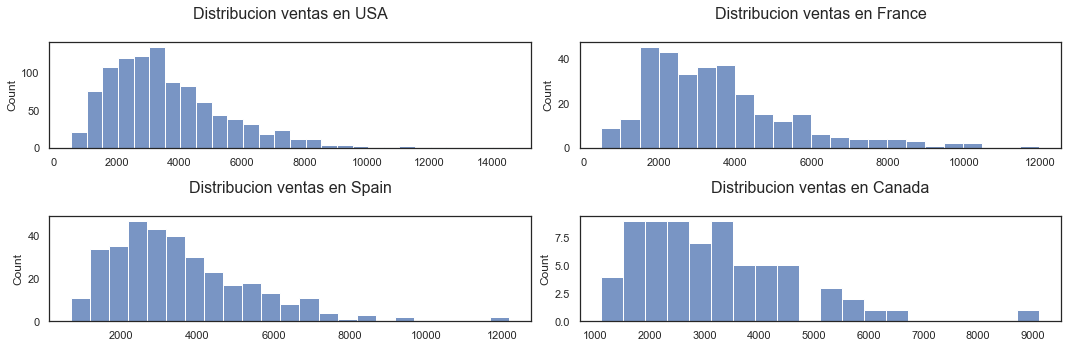

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), tight_layout=True)
distribution_plotter(ventas_usa, 'ventas en USA', ax[0][0])
distribution_plotter(ventas_france, 'ventas en France', ax[0][1])
distribution_plotter(ventas_spain, 'ventas en Spain', ax[1][0])
distribution_plotter(ventas_canada, 'ventas en Canada', ax[1][1], bin_width=400)

### Distribución de todos los países
Quise ir más allá del ejercicio, y buscar como mostrar las distribuciones de todos los países

In [143]:
paises = np.unique(data[:,5])
ventas_por_pais = []

for pais in paises:
    ventas_por_pais.append(data[:,1][data[:,5] == pais].astype(float))
print(f'La cantidad de países en el dataset son {len(paises)}')

La cantidad de países en el dataset son 19


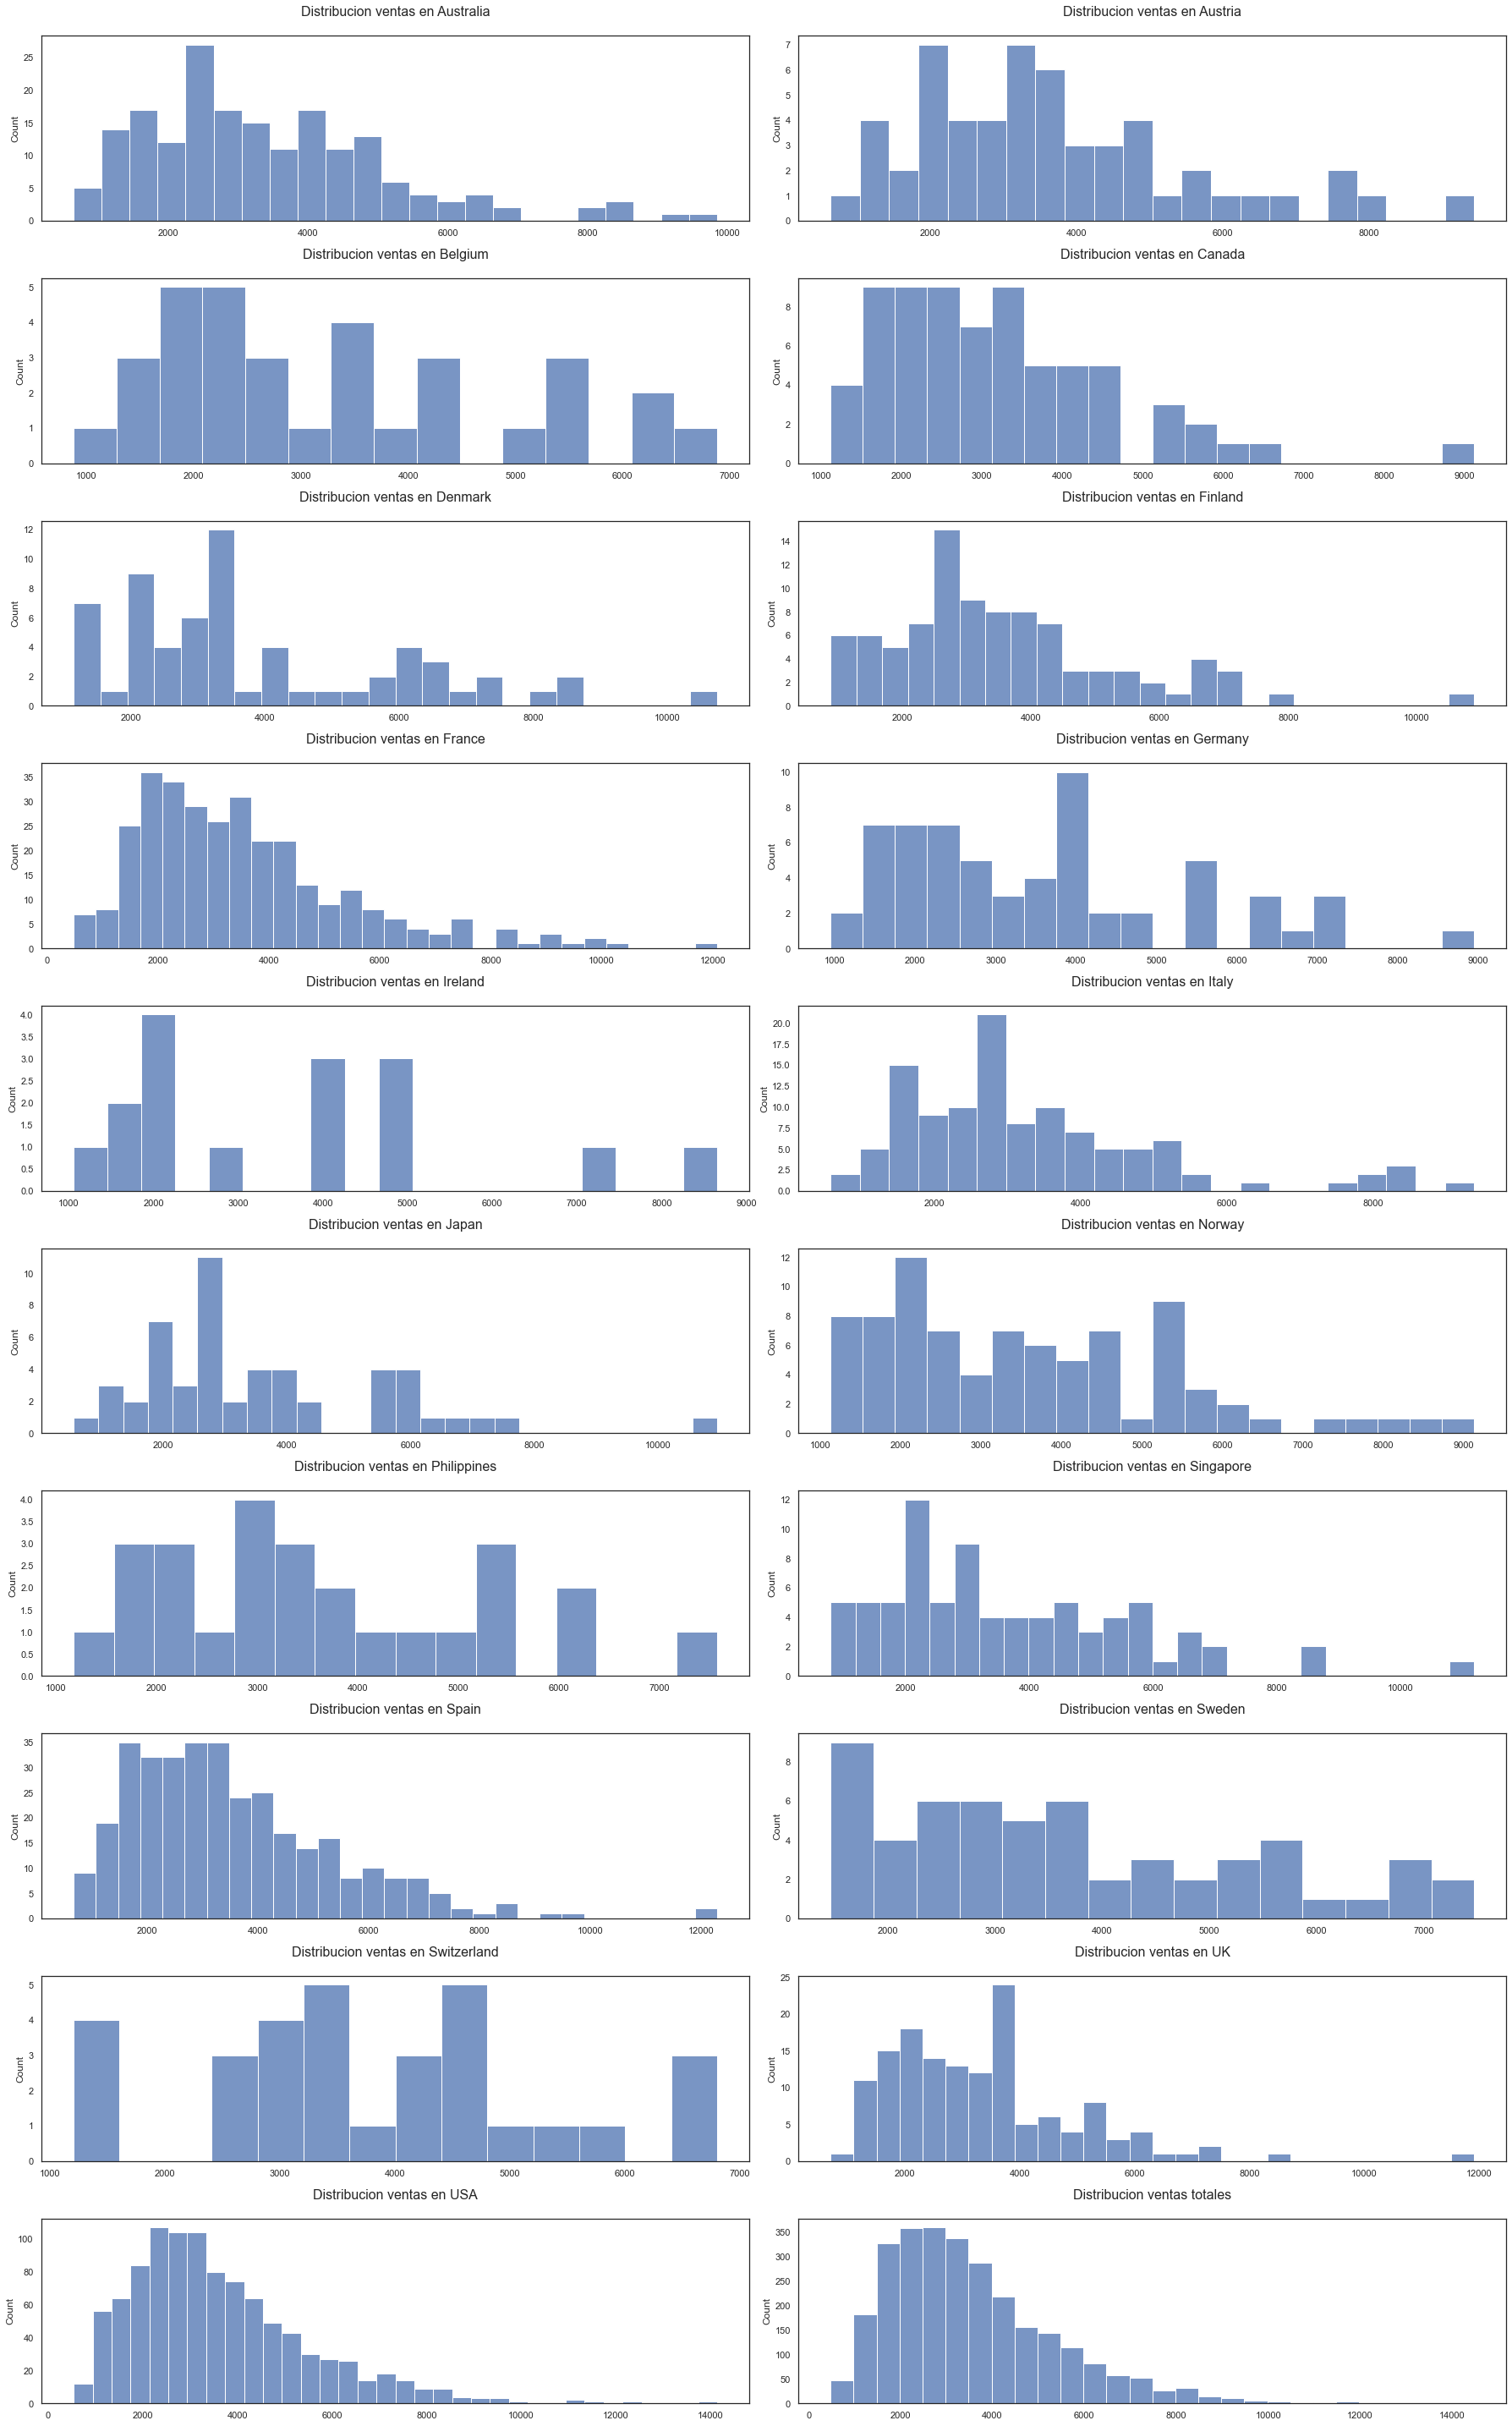

In [147]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(25,40), tight_layout=True)
# plt.subplots_adjust(hspace=0.1)
num_pais=0
for i in range(10):
    for j in range(2):
        if i==9 and j==1:
            # Creo este condicional para completar el último gráfico, ya que la cantidad de paises es impar
            distribution_plotter(data[:,1].astype(float), 'ventas totales', ax[9][1])
            break
        distribution_plotter(data[:,1][data[:,5] == paises[num_pais]].astype(float), 'ventas en {}'.format(paises[num_pais]), ax[i][j], bin_width=400)
        num_pais += 1

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [159]:
print(f'USA:\nMedia: {np.mean(ventas_usa)}\nMediana: {np.median(ventas_usa)}\nRango: {np.max(ventas_usa)-np.min(ventas_usa)}\nDesvío estandard: {np.std(ventas_usa)} ')
print(f'France:\nMedia: {np.mean(ventas_france)}\nMediana: {np.median(ventas_france)}\nRango: {np.max(ventas_france)-np.min(ventas_france)}\nDesvío estandard: {np.std(ventas_france)} ')
print(f'Canada:\nMedia: {np.mean(ventas_canada)}\nMediana: {np.median(ventas_canada)}\nRango: {np.max(ventas_canada)-np.min(ventas_canada)}\nDesvío estandard: {np.std(ventas_canada)} ')


USA:
Media: 3613.5287151394423
Mediana: 3236.06
Rango: 13541.66
Desvío estandard: 1879.9971929724536 
France:
Media: 3537.9507006369427
Mediana: 3154.3050000000003
Rango: 11257.570000000002
Desvío estandard: 1939.214360481481 
Canada:
Media: 3201.122285714286
Mediana: 2982.95
Rango: 7944.959999999999
Desvío estandard: 1432.1757123982193 
